In [220]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential, save_model
from keras import optimizers 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

In [221]:
batch_size = 32
epochs = 15

In [222]:
data_iter = ImageDataGenerator(validation_split=0.2, rescale=1./255)
train_data = data_iter.flow_from_directory(directory='ASL-Datasets/a_b_test', target_size=(50, 50), batch_size=batch_size, subset='training')
val_data = data_iter.flow_from_directory(directory='ASL-Datasets/a_b_test', target_size=(50, 50), batch_size=batch_size, subset='validation')


Found 10866 images belonging to 6 classes.
Found 2712 images belonging to 6 classes.


In [223]:
len(train_data)

340

In [224]:
train_data.classes
np.unique(train_data.classes)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [225]:
pretrained_model = ResNet50(include_top=False, weights='imagenet', input_shape=(50, 50, 3), pooling='max')
#pretrained_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(150, 150, 3), pooling='max')


In [226]:
pretrained_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           (None, 50, 50, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 56, 56, 3)    0           input_16[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 25, 25, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 25, 25, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [227]:
trainable_layer_count = 40

for layer in range(len(pretrained_model.layers) - trainable_layer_count):
    pretrained_model.layers.pop()
    
for layer in pretrained_model.layers:
    layer.trainable = True
    

In [228]:
model = Sequential()
model.add(pretrained_model)
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

In [229]:
optimizer = optimizers.Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              262656    
_________________________________________________________________
dense_45 (Dense)             (None, 64)                131136    
_________________________________________________________________
dropout_23 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 6)                 390       
Total params: 394,182
Trainable params: 391,238
Non-trainable params: 2,944
_________________________________________________________________


In [230]:
model.fit_generator(
        train_data,
        epochs=epochs,
        validation_data=val_data, 
        steps_per_epoch=len(train_data),
        validation_steps=len(val_data))

Epoch 1/15
340/340 [==============================] - 87s 257ms/step - loss: 1.5224 - acc: 0.3955 - val_loss: 1.1241 - val_acc: 0.5428
Epoch 2/15
340/340 [==============================] - 44s 129ms/step - loss: 0.9719 - acc: 0.6305 - val_loss: 0.7834 - val_acc: 0.7091
Epoch 3/15
340/340 [==============================] - 44s 129ms/step - loss: 0.7061 - acc: 0.7430 - val_loss: 2.3699 - val_acc: 0.4012
Epoch 4/15
340/340 [==============================] - 44s 129ms/step - loss: 0.5352 - acc: 0.8103 - val_loss: 1.3980 - val_acc: 0.5815
Epoch 5/15
340/340 [==============================] - 44s 129ms/step - loss: 0.4533 - acc: 0.8425 - val_loss: 0.2347 - val_acc: 0.9156
Epoch 6/15
340/340 [==============================] - 44s 129ms/step - loss: 0.3822 - acc: 0.8640 - val_loss: 0.4931 - val_acc: 0.8237
Epoch 7/15
340/340 [==============================] - 44s 129ms/step - loss: 0.3350 - acc: 0.8893 - val_loss: 0.3569 - val_acc: 0.8875
Epoch 8/15
340/340 [==============================] - 4

In [231]:
model.evaluate_generator(test_data, steps=62)

NameError: name 'test_data' is not defined

In [232]:
#test2_iter = ImageDataGenerator(rescale=1./255)
#test_data2 = test2_iter.flow_from_directory(directory='ASL-Datasets/new_test_data', target_size=(150, 150), batch_size=1)

#model.evaluate_generator(test_data2, steps=len(test_data2))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              262656    
_________________________________________________________________
dense_45 (Dense)             (None, 64)                131136    
_________________________________________________________________
dropout_23 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 6)                 390       
Total params: 394,182
Trainable params: 391,238
Non-trainable params: 2,944
_________________________________________________________________


In [ ]:
model.save('my_model.h5')

In [ ]:
#loaded_model = model('my_model.h5')
#loaded_model.summary()

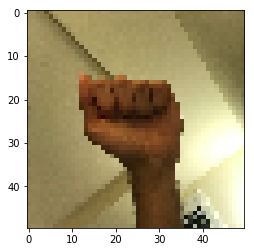

In [237]:
import numpy as np
import matplotlib.pyplot as plt

image2 = image.load_img('ASL-Datasets/arnav_test/predict/a.jpg', target_size=(50, 50))
image2 = image.img_to_array(image2) / 255
image2 = np.expand_dims(image2, axis=0)
plt.imshow(image2[0])
prediction = model.predict(image2)

In [238]:
print("Confidence: " + str(max(prediction[0])))
arg = np.argmax(prediction[0])
alphabet = ['A', 'B', 'C', 'D', 'E', 'F']
alphabet[arg]

Confidence: 0.7070109


'E'

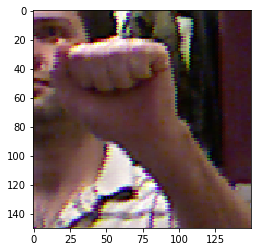

0.0